In [1]:
%matplotlib inline
import os
from glob import glob
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from scipy import ndimage
from skimage import feature

In [2]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src


In [3]:
TRAIN_PATH = '../../input/stage1_train/'
TEST_PATH = '../../input/stage1_test/'

In [4]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(len(train_ids), len(test_ids))

670 65


In [78]:
def paths(img_id, path, type_):
    masks_root = os.path.join(path, img_id, type_, '*')+'.png'
    
    return glob(masks_root)

def mask_paths(img_id, path):
    return paths(img_id, path, 'masks')

def img_paths(img_id, path):
    return paths(img_id, path, 'images')[0]

index = 4
masks = mask_paths(train_ids[index], TRAIN_PATH)
image = imread(img_paths(train_ids[index], TRAIN_PATH))

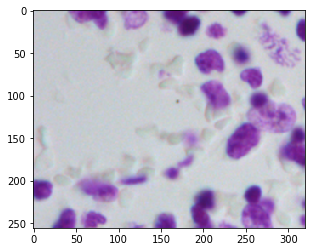

In [79]:
plt.imshow(image)

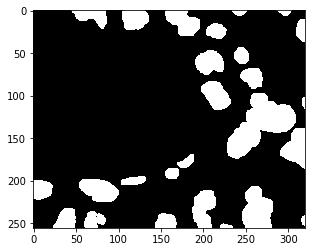

In [80]:
def concat_mask(masks):
    return np.sum(np.stack([imread(mask) for mask in masks], 0), 0)

mask = concat_mask(masks)
plt.imshow(mask, cmap='gray')

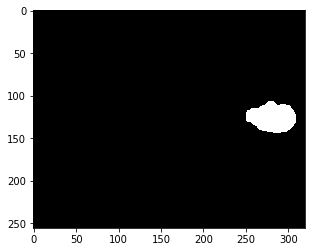

In [86]:
im = imread(masks[6])
plt.imshow(im, cmap='gray')

In [167]:
im.shape

(256, 320)

(40, 75)


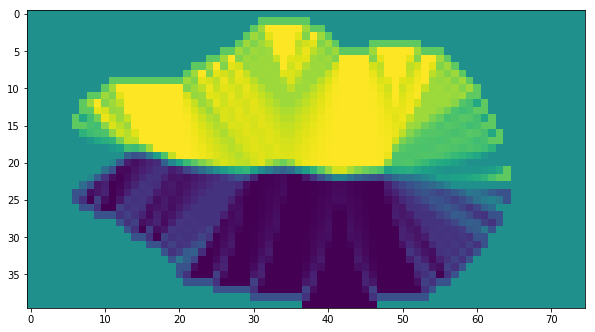

In [170]:
plt.figure(figsize=(10,15))
dist = ndimage.distance_transform_edt(im[105:145,245:])
print(dist.shape)
# plt.imshow(dist)
grad = np.gradient(dist)
plt.imshow(grad[0])

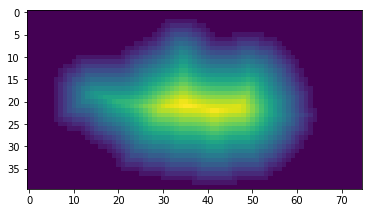

In [169]:
plt.imshow(dist)

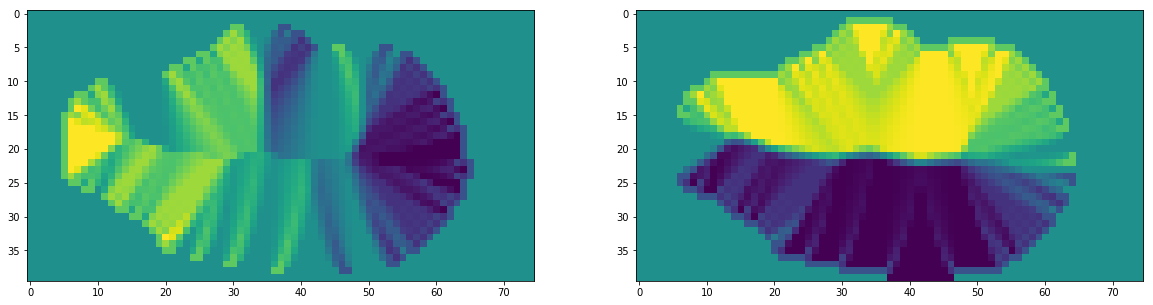

In [179]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(grad[1])
plt.subplot(222)
plt.imshow(grad[0])

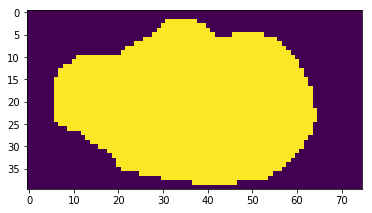

In [231]:
plt.imshow(im[105:145,245:])

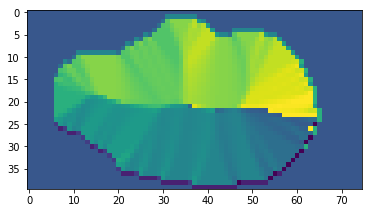

In [252]:
plt.imshow(((np.angle(grad[1] + grad[0] * 1.0j, deg=True) + (im[105:145,245:] / 255) * 180) / 360) * 255)

In [311]:
(imread(masks[2]) > 254).sum()

334

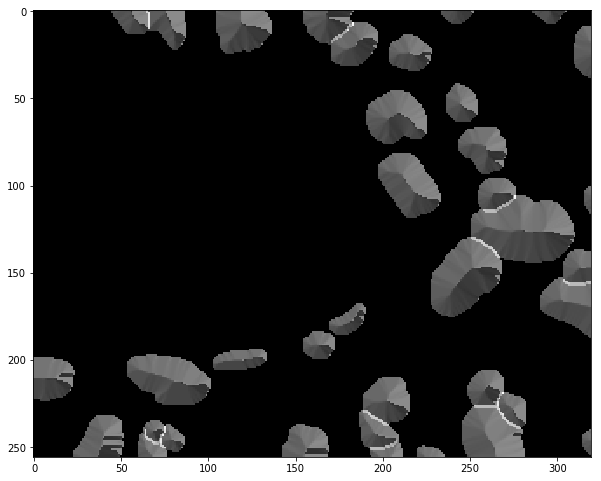

In [346]:
def to_angle(v, u, mask):
    angle = np.angle(v + u * 1.0j, deg=True)
    mask = np.logical_or(angle, mask > 0)
    angle = angle + mask * 360 # подтягиваем наверх градусы, чтобы 0 - это был фон, а не 0 угол
#     print(angle.max(), angle.min())
    return (angle / 540) * 255

def concat_masks_grad(masks):
    imgs = [imread(mask) for mask in masks]
    grads = [np.gradient(ndimage.distance_transform_edt(img)) for img in imgs]
    angles = [to_angle(grad[1], grad[0], img) for grad, img in zip(grads, imgs)]
    return np.sum(np.stack(angles, 0), 0)

plt.figure(figsize=(10,15))
plt.imshow(concat_masks_grad(masks), cmap='gray')

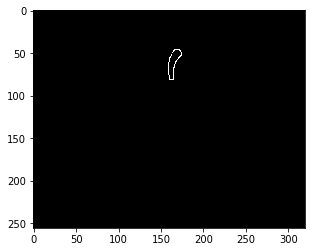

In [8]:
edges = feature.canny(im, sigma=1, low_threshold=10, high_threshold=50)
plt.imshow(edges, cmap='gray')

In [9]:
import data
from config import local

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
mask = data.flatten_masks(masks)
mask.shape

(256, 320, 1)

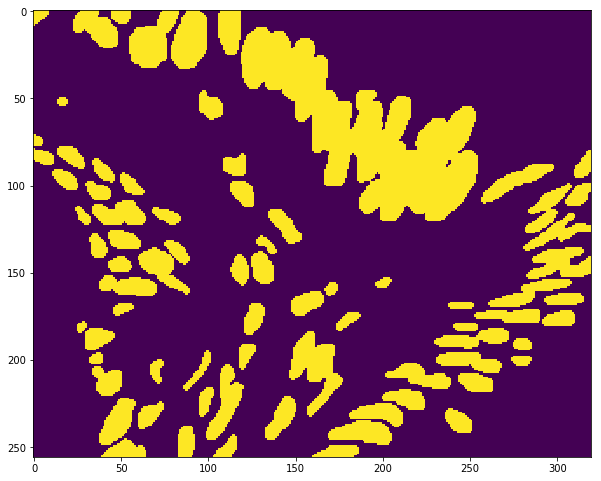

In [11]:
plt.figure(figsize=(10,15))
plt.imshow(mask[:,:,0])

In [10]:
from data import flatten_masks_edges

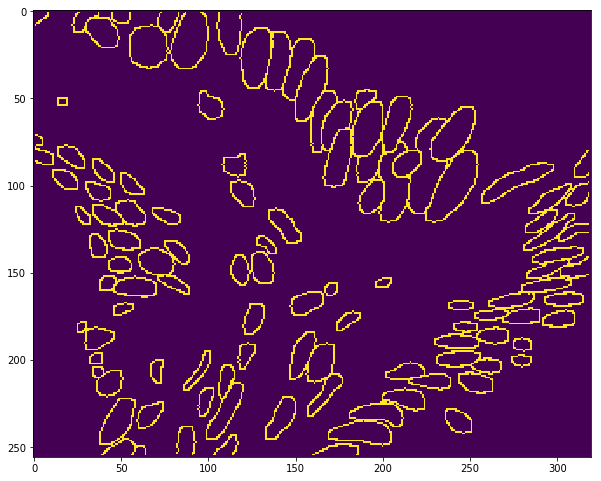

In [13]:
edges = flatten_masks_edges(masks)
plt.figure(figsize=(10,15))
plt.imshow(edges[:,:,0])

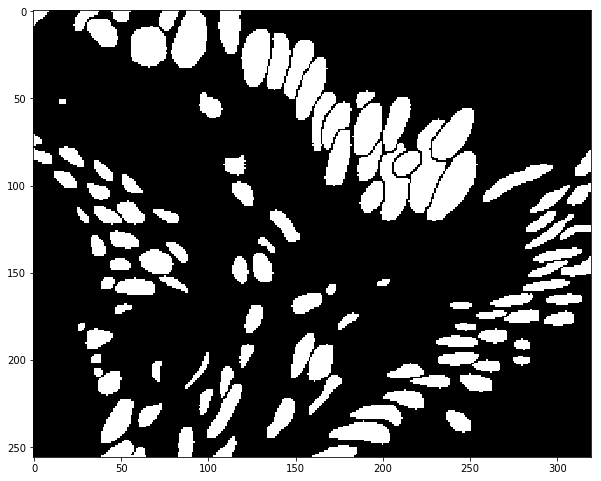

In [18]:
img = (mask & (edges != True))[:,:,0]
plt.figure(figsize=(10,15))
plt.imshow(img, cmap='gray')

In [30]:
from scipy import ndimage as ndi
from skimage.color import label2rgb

110


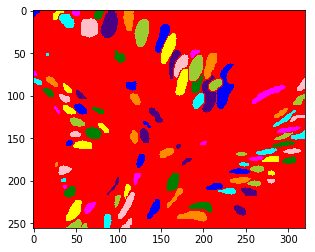

In [34]:
labels, count = ndi.label(img)
print(count)
# image_label_overlay = label2rgb(labeled_coins, image=coins)
plt.imshow(label2rgb(labels), interpolation='nearest')

76


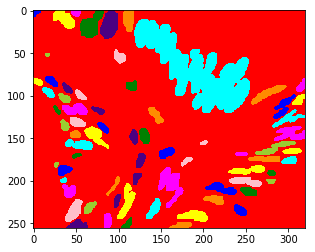

In [35]:
labels, count = ndi.label(mask[:,:,0])
print(count)
plt.imshow(label2rgb(labels))